In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /home/inflaton/code/sme-invoicing-assistant


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /home/inflaton/code/sme-invoicing-assistant/.env


True

In [4]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("results/llama3.2-vision_11b-qwen2.5_7b/emails.db")
# conn = sqlite3.connect("src/data/db/llama3.2-vision_11b-qwen2.5_7b/emails.db")

# Write your SQL query
query = "SELECT * FROM emails"

# Read the query results into a pandas DataFrame
df = pd.read_sql(query, conn)

df.head(5)

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,full_logs,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
0,93185A89130149C0A842968E4AFDCAA2,RobinLevine@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 43925,Hi Tanya ! Please find attached payment screen...,transaction_1.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22T06:13:19.794937,2025-01-22T06:13:32.932023,"[{""name"": ""input"", ""type"": ""HumanMessage"", ""co...",13.1371,8,2543,2195,348,0.0
1,614972488B7B411BAEA4814CF066CDAA,StevenNixon@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 51782,Hi Tanya ! Please find attached payment screen...,transaction_2.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22T06:13:32.940619,2025-01-22T06:13:37.345421,"[{""name"": ""input"", ""type"": ""HumanMessage"", ""co...",4.4048,28,9468,8135,1333,0.0
2,C484ABEB38F44D29960B1CEF58510627,MadisonFord@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 42968,Hi Tanya ! Please find attached payment screen...,transaction_3.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22T06:13:37.353438,2025-01-22T06:13:56.944767,"[{""name"": ""input"", ""type"": ""HumanMessage"", ""co...",19.5913,102,56516,52091,4425,0.0
3,706B3403E8024178948B3BFBF9E64A25,KathrynJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 92948,Hi Tanya ! Please find attached payment screen...,transaction_4.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22T06:13:56.952945,2025-01-22T06:14:00.849069,"[{""name"": ""input"", ""type"": ""HumanMessage"", ""co...",3.8961,230,143471,133922,9549,0.0
4,86838440CA6C472AACFA3FCE1382609C,ChristineOwens@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 20304,Hi Tanya ! Please find attached payment screen...,transaction_5.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22T06:14:00.862291,2025-01-22T06:14:24.372419,"[{""name"": ""input"", ""type"": ""HumanMessage"", ""co...",23.5101,454,302427,285863,16564,0.0


In [5]:
import json

json_file = "results/llama3.2-vision_11b-qwen2.5_7b/full_logs.json"

if "full_logs" in df.columns:
    last_completed = df[df["full_logs"] != ""].iloc[-1]
    full_logs = json.loads(last_completed["full_logs"])
    json.dump(full_logs, open(json_file, "w"), indent=4)
    conn.execute("ALTER TABLE emails DROP COLUMN full_logs")
    conn.execute("VACUUM")
    conn.commit()
    print("full_logs saved to", json_file)
else:
    full_logs = json.load(open(json_file))
    print("full_logs loaded from", json_file)

# Close the connection
conn.close()

full_logs saved to results/llama3.2-vision_11b-qwen2.5_7b/full_logs.json


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             2000 non-null   object
 1   sender_email         2000 non-null   object
 2   recipient_email      2000 non-null   object
 3   subject              2000 non-null   object
 4   email_body           2000 non-null   object
 5   attachments          2000 non-null   object
 6   process_status       2000 non-null   object
 7   response             2000 non-null   object
 8   start_time           2000 non-null   object
 9   end_time             2000 non-null   object
 10  full_logs            2000 non-null   object
 11  total_time           2000 non-null   object
 12  successful_requests  2000 non-null   object
 13  total_tokens         2000 non-null   object
 14  prompt_tokens        2000 non-null   object
 15  completion_tokens    2000 non-null   object
 16  total_

In [7]:
df.describe()

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,full_logs,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,2000,1988,1,1947,2000,1001,3,873,2000,2000,2000,1818,1997,2000,2000,2000,1
top,0527b19a-4b60-4768-9c45-c23fb3bc1ffa,MichaelJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice I13212,Subject: Payment Confirmation for Invoice I178...,,SUCCESS,"{""content"": ""DONE""}",2025-01-23T07:08:58.593166,2025-01-23T07:09:10.710015,"[{""name"": ""input"", ""type"": ""HumanMessage"", ""co...",0.5501,96,111519789,104282738,7237051,0.0
freq,1,3,2000,3,1,1000,1069,1036,1,1,1,4,2,1,1,1,2000


In [8]:
# plot the distribution of categories
import matplotlib.pyplot as plt


def plot_value_distribution(df2, col="category", top_n=10):
    df2[col].value_counts()[:top_n].plot(kind="bar")
    plt.title(f"Distribution of {col}")

    # add the count on top of the bars
    for i in range(len(df2[col].value_counts()[:top_n])):
        count = df2[col].value_counts().values[i]
        plt.text(i, count, count, ha="center")

    plt.show()

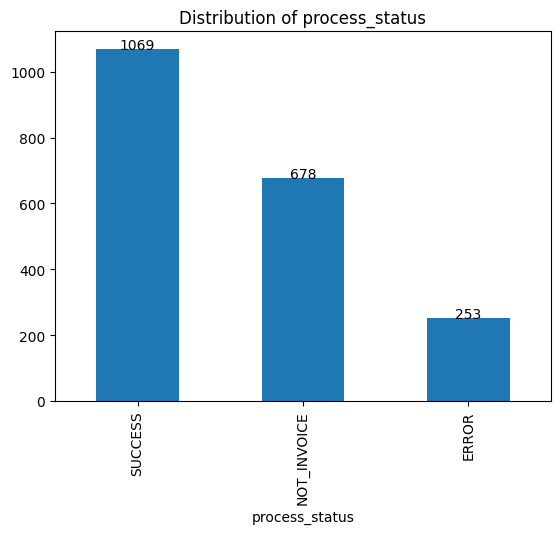

In [9]:
plot_value_distribution(df, "process_status")

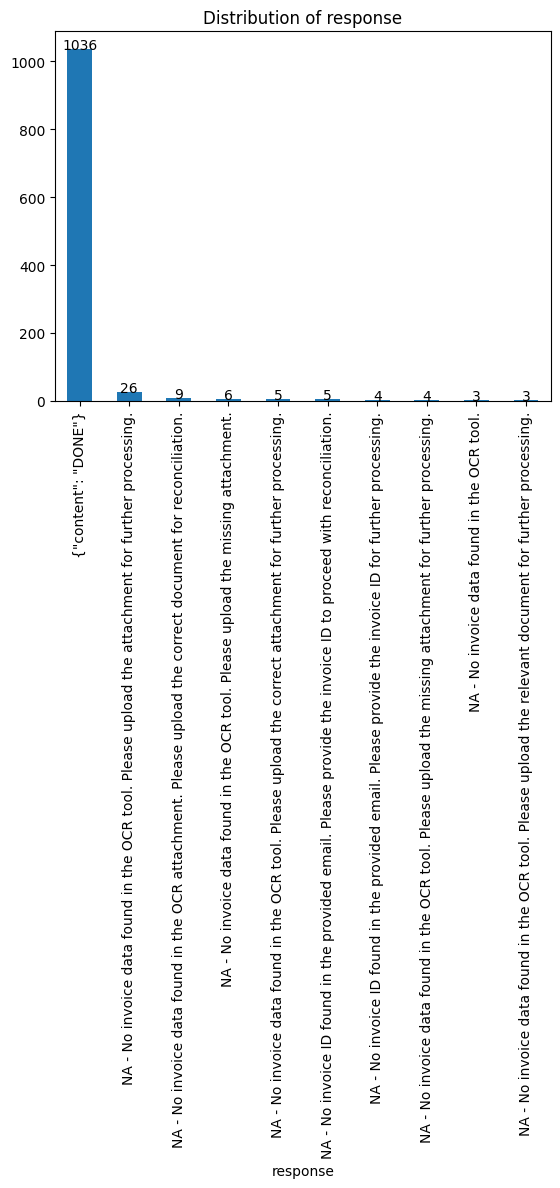

In [10]:
plot_value_distribution(df, "response")

In [11]:
df["end_time"] = pd.to_datetime(df["end_time"])
df["start_time"] = pd.to_datetime(df["start_time"])
df["duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds()

In [12]:
df[["duration", "total_time"]].head()

,duration,total_time
0,13.137086,13.1371
1,4.404802,4.4048
2,19.591329,19.5913
3,3.896124,3.8961
4,23.510128,23.5101


<Axes: ylabel='Frequency'>

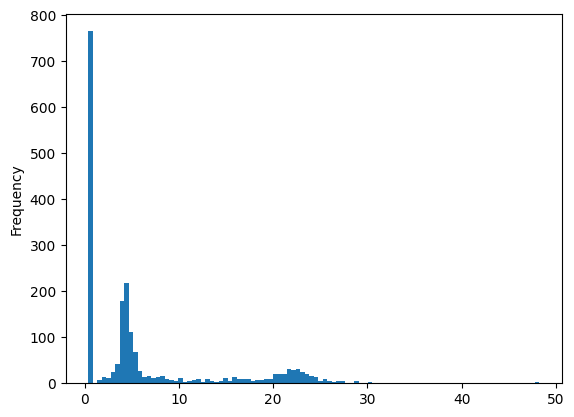

In [13]:
# plot the distribution of duration
df["duration"].plot(kind="hist", bins=100)

In [14]:
df[df["duration"] > 48]

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,full_logs,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost,duration
357,D9BA10CCD9CF454987F998937CD96BAC,JamesWatkins@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 84277,Hi Tanya ! Please find attached payment screen...,transaction_358.jpeg,ERROR,ERROR: No records found for Invoice ID: Invoic...,2025-01-22 07:20:17.065942,2025-01-22 07:21:05.133275,"[{""name"": ""input"", ""type"": ""HumanMessage"", ""co...",48.0673,4041878,2761932391,2658235900,103696491,0.0,48.067333
715,D3D010BEA9ED4F5E96ED21FD549EFA35,DeannaCarson@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 54981,Hi Tanya ! Please find attached payment screen...,transaction_716.jpeg,ERROR,ERROR: The query result indicates that the inv...,2025-01-22 08:27:46.458368,2025-01-22 08:28:34.659213,"[{""name"": ""input"", ""type"": ""HumanMessage"", ""co...",48.2008,16878648,11633092264,11208412910,424679354,0.0,48.200845


In [15]:
df["duration"].describe()

count    2000.000000
mean        6.644924
std         8.170672
min         0.389306
25%         0.565168
50%         4.121140
75%         7.149593
max        48.200845
Name: duration, dtype: float64

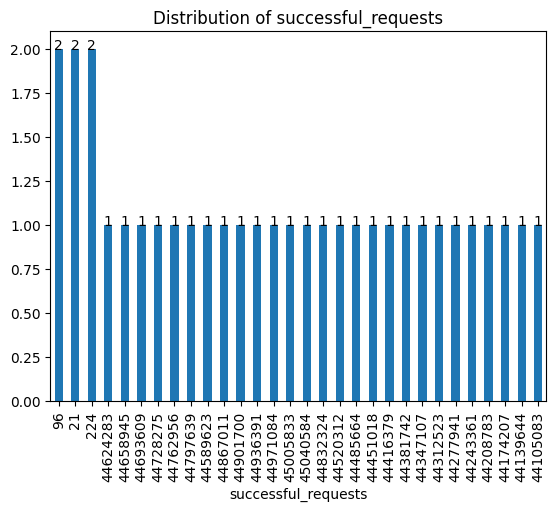

In [16]:
plot_value_distribution(df, "successful_requests", top_n=30)

In [17]:
df["process_status"].value_counts()

process_status
SUCCESS        1069
NOT_INVOICE     678
ERROR           253
Name: count, dtype: int64

In [18]:
success_rate = df["process_status"].value_counts()["SUCCESS"] / len(df)
success_rate

0.5345

In [19]:
def total_power_in_watt(file_path):
    df = pd.read_csv(file_path)
    return df["CPU Package Power [W]"].mean() + df["GPU Power [W]"].mean()

In [20]:
power_idle = total_power_in_watt("results/power_idle.csv")
power_idle

29.873

In [21]:
power_with_vision = total_power_in_watt(
    "results/llama3.2-vision_11b-qwen2.5_7b/power_with_vision.csv"
)
power_without_vision = total_power_in_watt(
    "results/llama3.2-vision_11b-qwen2.5_7b/power_without_vision.csv"
)
power_with_vision, power_without_vision

(318.228, 298.1394)

In [22]:
mean_response_time = df["duration"].mean()
mean_response_time

6.644923974999999

In [23]:
average_energy_consumption = (
    (power_with_vision + power_without_vision) / 2 - power_idle
) * mean_response_time
average_energy_consumption

1849.3534429290328

In [24]:
df.describe()

,start_time,end_time,duration
count,2000,2000,2000.000000
mean,2025-01-22 12:02:41.827959552,2025-01-22 12:02:48.472883712,6.644924
min,2025-01-22 06:13:19.794937,2025-01-22 06:13:32.932023,0.389306
25%,2025-01-22 07:47:48.680697088,2025-01-22 07:48:10.229940224,0.565168
50%,2025-01-22 09:22:32.714900480,2025-01-22 09:22:43.940564992,4.121140
75%,2025-01-22 09:40:51.122392832,2025-01-22 09:40:51.627508224,7.149593
max,2025-01-23 07:08:58.593166,2025-01-23 07:09:10.710015,48.200845
std,NaN,NaN,8.170672


In [25]:
row = df[df["process_status"] == "NOT_INVOICE"].iloc[0]
row

email_id                                50EB8D74C46C4EA6B84A4B19C82DA8BD
sender_email                                    MatthewLopez@example.com
recipient_email                             tanya.official.456@gmail.com
subject                       Payment Confirmation for Invoice ID: 79862
email_body             Hi Tanya ! Please find attached payment screen...
attachments                                          transaction_60.jpeg
process_status                                               NOT_INVOICE
response               NA\n\n---\n\nIt seems there is a repetition an...
start_time                                    2025-01-22 06:24:22.685047
end_time                                      2025-01-22 06:24:46.826927
full_logs              [{"name": "input", "type": "HumanMessage", "co...
total_time                                                       24.1419
successful_requests                                               118704
total_tokens                                       

In [26]:
full_logs[0]

{'name': 'input',
 'type': 'HumanMessage',
 'content': '\n                Help to reconcile invoices using the following email:\n\n                \n            Sender: lori31@example.org\n            Subject: Payment Confirmation for Invoice I15423\n            Body: Subject: Payment Confirmation for Invoice I15423\n                Anthony Greene <lori31@example.org>\n                Sat, Jan 04, 2025, 05:06 PM\n                Dear Tanya, I hope this message finds you well.I am writing to confirm that we have successfully made the payment for Invoice I15423, related to our recent order with you. Here are the details:  \n                Description:\n                Invoice Date: November 26, 2024\n                Item: Wester Suit Women\n                Quantity: 4\n                Subtotal: $326.3\n                Tax (10%): $32.63\n                Shipping (if applicable): $19.92\n                Total Amount paid: $378.85\n                Transaction Reference Number - TXN-MST-489

In [ ]:
for i, log in enumerate(full_logs):
    if row["attachments"] in log["content"]:
        print(i)
        break

In [28]:
full_logs[i : i + 5]

[{'name': 'invoice_db_update_tool',
  'type': 'ToolMessage',
  'content': '{"content": "DONE"}',
  'timestamp': '2025-01-23T07:09:10.701751',
  'usage': {'input_tokens': 0,
   'output_tokens': 0,
   'total_tokens': 0,
   'input_token_details': {'audio': 0, 'cache_read': 0},
   'output_token_details': {'audio': 0, 'reasoning': 0}},
  'model_name': '',
  'additional_kwargs': {}}]